In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-80s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


# checking basic integrity

In [4]:
data.shape

(6908, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 19 columns):
track               6908 non-null object
artist              6908 non-null object
uri                 6908 non-null object
danceability        6908 non-null float64
energy              6908 non-null float64
key                 6908 non-null int64
loudness            6908 non-null float64
mode                6908 non-null int64
speechiness         6908 non-null float64
acousticness        6908 non-null float64
instrumentalness    6908 non-null float64
liveness            6908 non-null float64
valence             6908 non-null float64
tempo               6908 non-null float64
duration_ms         6908 non-null int64
time_signature      6908 non-null int64
chorus_hit          6908 non-null float64
sections            6908 non-null int64
target              6908 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.0+ MB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


# checking for duplicate rows

In [9]:
data['uri'].nunique(), 

(6898,)

In [10]:
data['uri'].value_counts()


6ArFGc1tVxYEhmGreRYoAi    2
0v9kGNjkKdQUdDoBIuiph4    2
4XcUFQNTiX4IHmA4K51snP    2
3dXSVFWK1s0PgtMrAifdDd    2
3uy0jtkM8QYVTsBazkli1x    2
                         ..
0k3fBeBIcok5gbYQyQbxP5    1
51o0KKiJkY7EOpxm0vtSs1    1
09b2HxtYBFeBRoqcTdCCeJ    1
2xEhTQcmrRNaxfUOvSAgXo    1
6i1uWZYWabNHq2wQnoca58    1
Name: uri, Length: 6898, dtype: int64

In [11]:
data['uri'].value_counts().unique() 

array([2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 6ArFGc1tVxYEhmGreRYoAi    True
 0v9kGNjkKdQUdDoBIuiph4    True
 4XcUFQNTiX4IHmA4K51snP    True
 3dXSVFWK1s0PgtMrAifdDd    True
 3uy0jtkM8QYVTsBazkli1x    True
 1gQPqkrPZ1RypZvSYEAygs    True
 3EgvmOhP3NQUHY7d6PDOUg    True
 35Z9SYT8AjvgvUag0H4iQt    True
 3PzsbWSQdLCKDLxn7YZfkM    True
 7vvRkLPIvfjjmCIqNxBuEZ    True
 Name: uri, dtype: bool>, (10,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['6ArFGc1tVxYEhmGreRYoAi',
 '0v9kGNjkKdQUdDoBIuiph4',
 '4XcUFQNTiX4IHmA4K51snP',
 '3dXSVFWK1s0PgtMrAifdDd',
 '3uy0jtkM8QYVTsBazkli1x',
 '1gQPqkrPZ1RypZvSYEAygs',
 '3EgvmOhP3NQUHY7d6PDOUg',
 '35Z9SYT8AjvgvUag0H4iQt',
 '3PzsbWSQdLCKDLxn7YZfkM',
 '7vvRkLPIvfjjmCIqNxBuEZ']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(6888, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6888 entries, 0 to 6907
Data columns (total 19 columns):
track               6888 non-null object
artist              6888 non-null object
uri                 6888 non-null object
danceability        6888 non-null float64
energy              6888 non-null float64
key                 6888 non-null int64
loudness            6888 non-null float64
mode                6888 non-null int64
speechiness         6888 non-null float64
acousticness        6888 non-null float64
instrumentalness    6888 non-null float64
liveness            6888 non-null float64
valence             6888 non-null float64
tempo               6888 non-null float64
duration_ms         6888 non-null int64
time_signature      6888 non-null int64
chorus_hit          6888 non-null float64
sections            6888 non-null int64
target              6888 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.1+ MB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (6888, 19)
no. of unique rows 6888


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

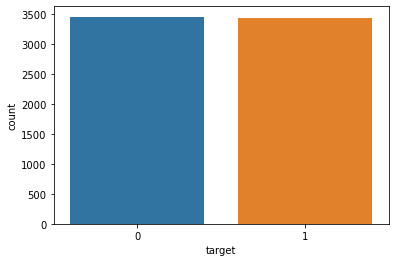

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') 

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6888 entries, 0 to 6907
Data columns (total 4 columns):
danceability    6888 non-null float64
energy          6888 non-null float64
key             6888 non-null int64
loudness        6888 non-null float64
dtypes: float64(3), int64(1)
memory usage: 589.1 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()


,danceability,energy,key,loudness
count,6888.000000,6888.000000,6888.000000,6888.000000
mean,0.563847,0.608058,5.236353,-11.040628
std,0.172947,0.243045,3.596968,4.682540
min,0.065600,0.000276,0.000000,-39.940000
25%,0.455000,0.435000,2.000000,-13.447000
50%,0.582000,0.637000,5.000000,-10.662000
75%,0.690000,0.809000,9.000000,-7.637750
max,0.988000,1.000000,11.000000,-0.683000


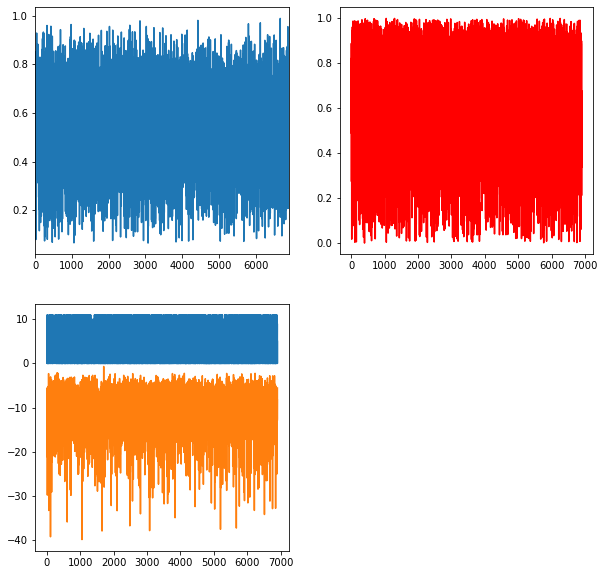

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])


#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(6888, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6888 entries, 0 to 6907
Data columns (total 5 columns):
mode                6888 non-null int64
speechiness         6888 non-null float64
acousticness        6888 non-null float64
instrumentalness    6888 non-null float64
liveness            6888 non-null float64
dtypes: float64(4), int64(1)
memory usage: 322.9 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000
mean,0.687863,0.057832,0.293316,0.140259,0.201021
std,0.463399,0.057742,0.303117,0.288468,0.181697
min,0.000000,0.022300,0.000001,0.000000,0.018600
25%,0.000000,0.032700,0.033400,0.000003,0.084900
50%,1.000000,0.040600,0.172000,0.000323,0.131000
75%,1.000000,0.057900,0.499000,0.046000,0.266000
max,1.000000,0.903000,0.996000,1.000000,0.997000


<AxesSubplot:xlabel='mode', ylabel='count'>

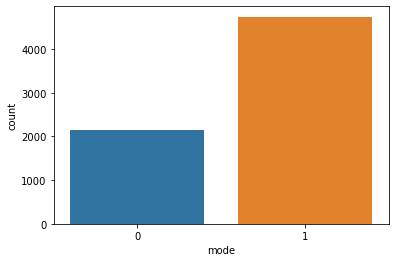

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6888 entries, 0 to 6907
Data columns (total 6 columns):
valence           6888 non-null float64
tempo             6888 non-null float64
duration_ms       6888 non-null int64
time_signature    6888 non-null int64
chorus_hit        6888 non-null float64
sections          6888 non-null int64
dtypes: float64(3), int64(3)
memory usage: 696.7 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,6888.000000,6888.000000,6.888000e+03,6888.000000,6888.000000,6888.000000
mean,0.587686,120.669212,2.547319e+05,3.926103,39.759043,11.276132
std,0.263811,27.133829,1.074082e+05,0.356928,19.155173,4.474940
min,0.000010,39.002000,2.951400e+04,1.000000,0.000000,1.000000
25%,0.383000,102.622750,2.044935e+05,4.000000,27.439040,9.000000
50%,0.621500,119.546000,2.418600e+05,4.000000,35.573990,11.000000
75%,0.811000,135.196250,2.870000e+05,4.000000,47.316392,13.000000
max,0.990000,217.396000,2.223827e+06,5.000000,433.182000,73.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((6888, 15), (6888,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
7,instrumentalness,1208.963546,3.404364e-244
0,danceability,949.549776,1.905489e-195
6,acousticness,645.604961,3.253868e-136
9,valence,508.703683,9.761857e-109
3,loudness,459.261867,1.099870e-98
5,speechiness,274.449278,1.781137e-60
1,energy,247.969894,6.479587e-55
12,time_signature,114.180142,1.915976e-26
8,liveness,70.621513,5.206727e-17
10,tempo,14.560149,1.369443e-04


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

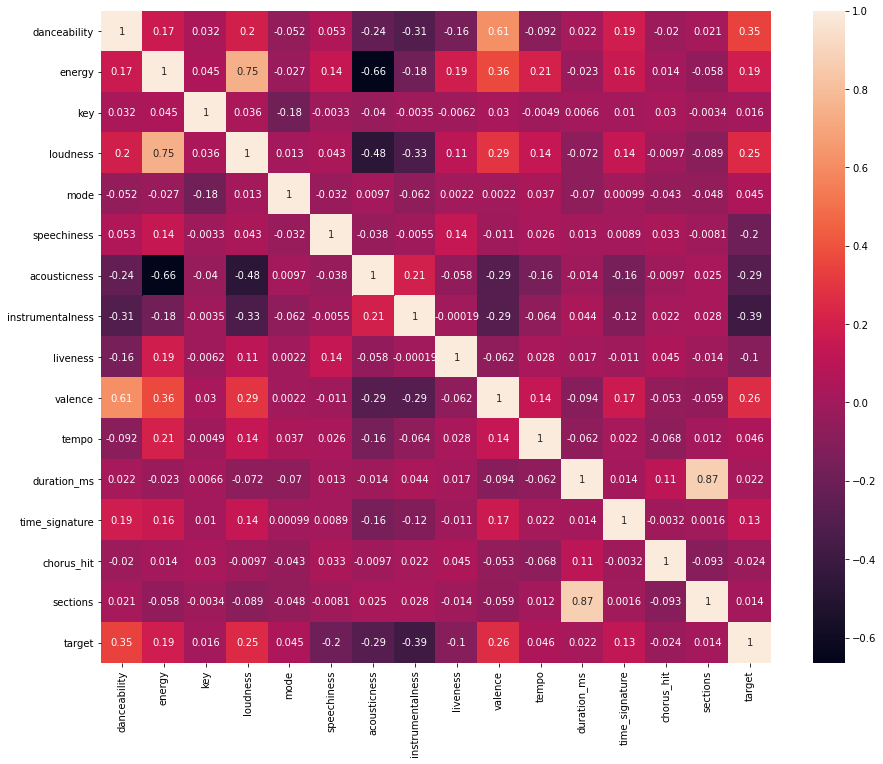

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo